In [1]:
import os
import numpy as np
import pandas as pd

# Generate Function Plot

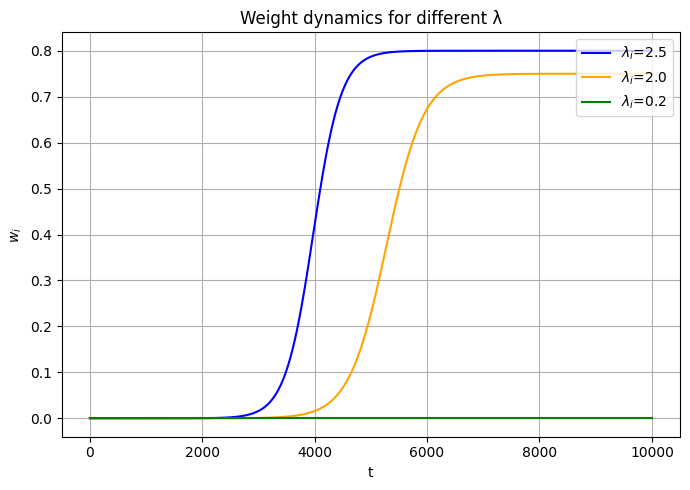

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parameters
tau = 1/0.001          # time constant
N = 1           # number of units
gamma = 0.5        # learning rate scaling
w0 = 1e-7           # initial weight
shift = 10000
base = 0
t = np.linspace(base, base+shift, 500)  # time vector (avoid t=0 to prevent singularity)

# Range of lambda_i values
n = 3
# lambdas = N*(np.random.rand(n))/((0.2-0))
lambdas_raw = [2.5, 2.0, 0.2]
lambdas = []
for l in lambdas_raw: 
    lambdas.append(l*N)
n = len(lambdas)

def w_i(t, lambda_i, tau, N, gamma, w0):
    xi = 1 - (N * gamma) / lambda_i
    num = xi * np.exp((2 * xi * lambda_i / tau) * t)
    den = np.exp((2 * xi * lambda_i / tau) * t) - 1 + xi / w0
    return num / den

# Plot
colors = ["blue", "orange", "green"]
plt.figure(figsize=(7, 5))
ws = []
# w_x = w_i(t, 0.15, tau, N, gamma, w0)
w_total = 0
for lam in lambdas:
    w = w_i(t, lam, tau, N, gamma, w0)
    # ws[lam] = w
    ws.append(w)
    w_total += w
    plt.plot(t, w, label=f"$λ_i$={lam}", color=colors[lambdas.index(lam)])
# for w in ws:    
    # plt.plot(t, w, label=f"$λ_i$=")

plt.xlabel("t")
plt.ylabel("$w_i$")
plt.title("Weight dynamics for different λ")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
# plt.show()
plt.savefig('./writing_plot/theory_curve.pdf')
